In [1]:
#Importing the libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Violations_url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-21/gdpr_violations.tsv"

In [3]:
#Openning data
Violations=pd.read_csv(Violations_url,sep="\t")
Violations.head()

,id,picture,name,price,authority,date,controller,article_violated,type,source,summary
0,1,https://www.privacyaffairs.com/wp-content/uplo...,Poland,9380,Polish National Personal Data Protection Offic...,10/18/2019,Polish Mayor,Art. 28 GDPR,Non-compliance with lawful basis for data proc...,https://uodo.gov.pl/decyzje/ZSPU.421.3.2019,No data processing agreement has been conclude...
1,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,10/17/2019,UTTIS INDUSTRIES,Art. 12 GDPR|Art. 13 GDPR|Art. 5 (1) c) GDPR|A...,Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
2,3,https://www.privacyaffairs.com/wp-content/uplo...,Spain,60000,Spanish Data Protection Authority (AEPD),10/16/2019,Xfera Moviles S.A.,Art. 5 GDPR|Art. 6 GDPR,Non-compliance with lawful basis for data proc...,https://www.aepd.es/resoluciones/PS-00262-2019...,The company had unlawfully processed the perso...
3,4,https://www.privacyaffairs.com/wp-content/uplo...,Spain,8000,Spanish Data Protection Authority (AEPD),10/16/2019,Iberdrola Clientes,Art. 31 GDPR,Failure to cooperate with supervisory authority,https://www.aepd.es/resoluciones/PS-00304-2019...,Iberdrola Clientes violated Article 13 of the ...
4,5,https://www.privacyaffairs.com/wp-content/uplo...,Romania,150000,Romanian National Supervisory Authority for Pe...,10/09/2019,Raiffeisen Bank SA,Art. 32 GDPR,Failure to implement sufficient measures to en...,https://www.dataprotection.ro/?page=Comunicat_...,Raiffeisen Bank Romania did not observe the ne...


In [4]:
#Checking available columns
Violations.columns

Index(['id', 'picture', 'name', 'price', 'authority', 'date', 'controller',
       'article_violated', 'type', 'source', 'summary'],
      dtype='object')

In [5]:
#Checking the missing values

Violations.isna().sum()

id                  0
picture             0
name                0
price               0
authority           0
date                0
controller          0
article_violated    0
type                0
source              0
summary             0
dtype: int64

1. Time breakdown of the total violations in the EU.

In [6]:
# Converting date column to pandas datetime format
Violations['date'] = pd.to_datetime(Violations['date'])
# Grouping by year and month, and swe also need to sum number of violations for each group
time_breakdown = Violations.groupby([Violations['date'].dt.year, Violations['date'].dt.month]).agg({'article_violated': 'count'})
time_breakdown.index.names = ['Year', 'Month']
print(time_breakdown)

            article_violated
Year Month                  
1970 1                    15
2018 5                     1
     7                     1
     9                     1
     10                    1
     11                    2
     12                    5
2019 1                    10
     2                    13
     3                    14
     4                    11
     5                     9
     6                     9
     7                    12
     8                     8
     9                    10
     10                   30
     11                   23
     12                   21
2020 1                    13
     2                    21
     3                    20


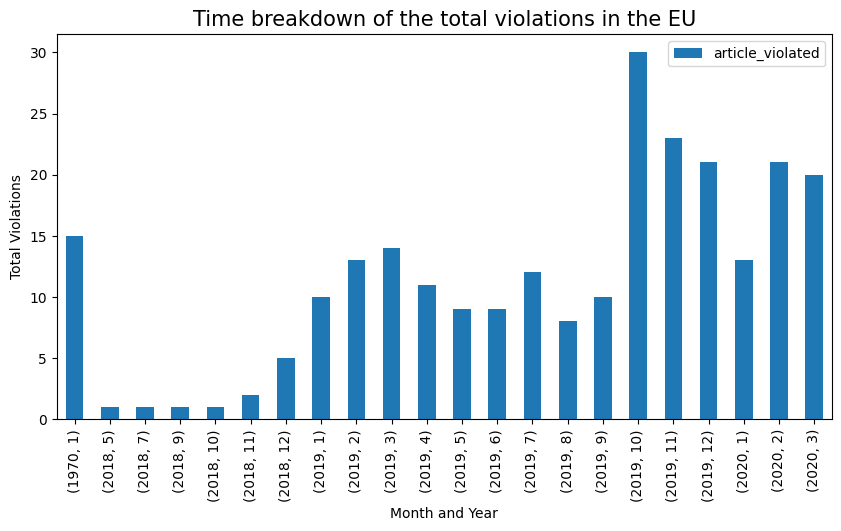

In [7]:
time_breakdown.plot(kind='bar', figsize=(10, 5))
plt.title("Time breakdown of the total violations in the EU", fontsize= 15, color ="black")
plt.xlabel('Month and Year')
plt.ylabel('Total Violations')
plt.show()

2. Most expensive violation by country, listing the specific violation type e.g failure to comply with processing regulation.

In [8]:
most_expensive_violation = Violations.groupby('name')['price'].max().sort_values(ascending=False)[:10]
most_expensive_violation

name
France            50000000
Italy             27802946
Austria           18000000
Germany           14500000
Sweden             7000000
Bulgaria           2600000
Netherlands         900000
Poland              644780
Portugal            400000
United Kingdom      320000
Name: price, dtype: int64

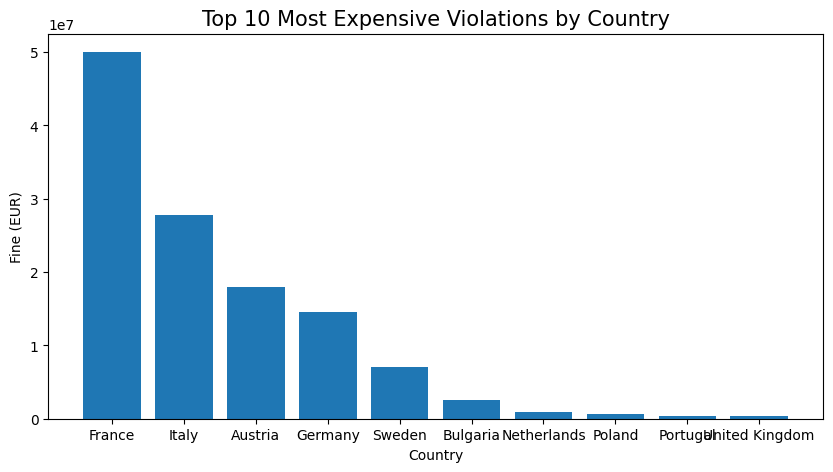

In [9]:
# Plot the bar graph
plt.figure(figsize=(10, 5))
plt.bar(most_expensive_violation.index, most_expensive_violation.values)
plt.xlabel('Country')
plt.ylabel('Fine (EUR)')
plt.title('Top 10 Most Expensive Violations by Country', fontsize=15, color = 'black')
plt.show()

3.Vodafone's GDPR violations in volume.

In [10]:
# Sort the names in the column 'Name' that start with 'vodarcome'
Vodafone_names = Violations[Violations['controller'].str.startswith('Vodafone')].sort_values('controller')

# Print the sorted names
print(Vodafone_names['controller'])

82             Vodafone Espana
194            Vodafone Espana
159            Vodafone Espana
158            Vodafone Espana
145            Vodafone Espana
144            Vodafone Espana
195            Vodafone Espana
142            Vodafone Espana
141            Vodafone Espana
91             Vodafone Espana
89             Vodafone Espana
224            Vodafone España
223            Vodafone España
222            Vodafone España
220            Vodafone España
214            Vodafone España
205    Vodafone España, S.A.U.
203    Vodafone España, S.A.U.
202    Vodafone España, S.A.U.
201    Vodafone España, S.A.U.
143               Vodafone ONO
213               Vodafone ONO
237           Vodafone Romania
239           Vodafone Romania
Name: controller, dtype: object


In [11]:
# Create a subset of the Violations dataframe where controller starts with "Vodafone"
vodafone_subset = Violations[Violations['controller'].str.startswith('Vodafone')]

# Count the number of Vodafone GDPR violations
num_vodafone_violations = len(vodafone_subset)

# Print the number of Vodafone GDPR violations
print(f"Vodafone has {num_vodafone_violations} GDPR violations.")

Vodafone has 24 GDPR violations.


4.Companies with the highest violations 

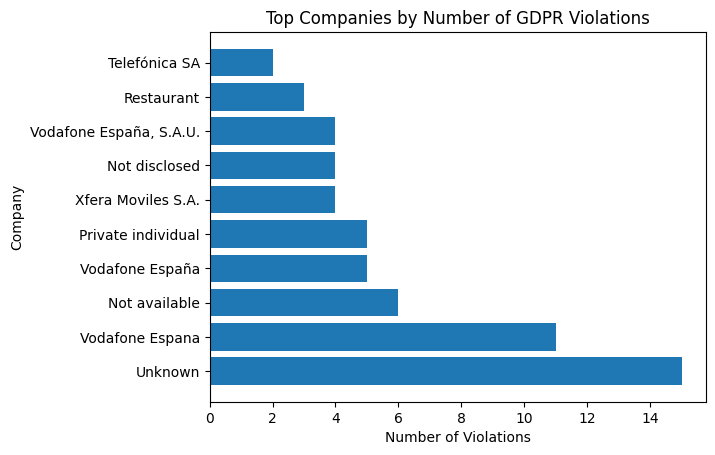

In [12]:
# Find the top 10 companies with the highest number of violations
top_companies = Violations['controller'].value_counts().nlargest(10)

# Create a horizontal bar chart to visualize the results
plt.barh(top_companies.index, top_companies.values)
plt.xlabel('Number of Violations')
plt.ylabel('Company')
plt.title('Top Companies by Number of GDPR Violations')
plt.show()

5.Map the data and make this interactive.

C:\Users\James.Osolo\AppData\Local\Temp\ipykernel_19044\4184243002.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm, orientation='horizontal')  # change orientation to horizontal


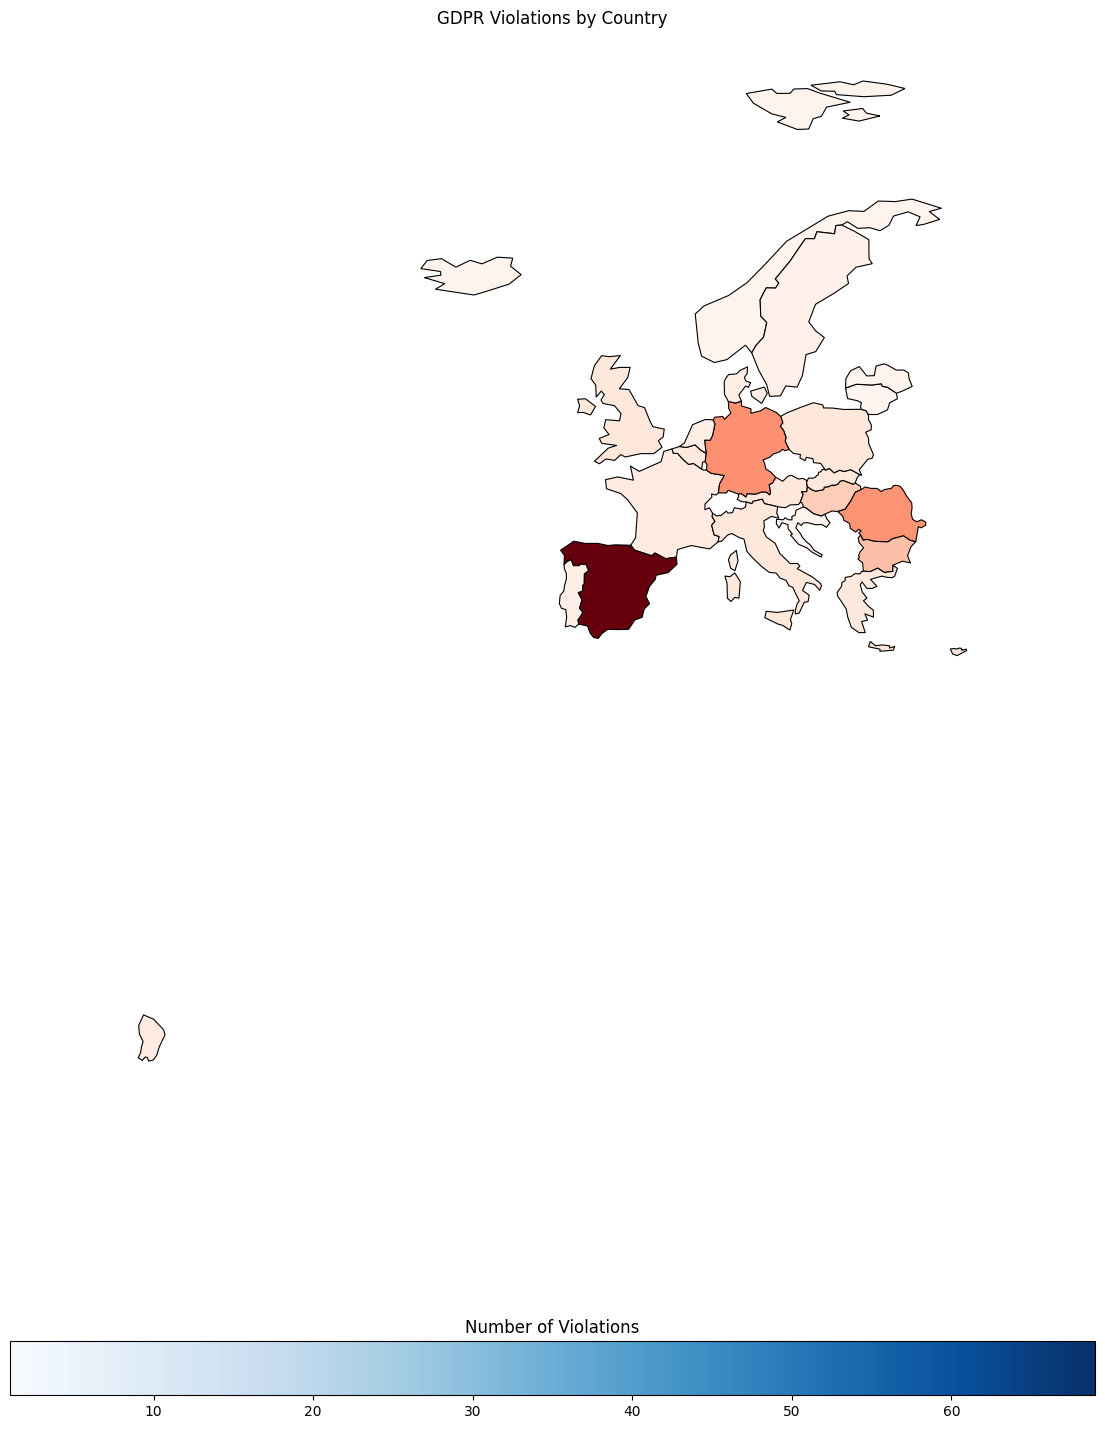

In [13]:
# Load the world shapefile into a GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the violations data with the world shapefile on the country names
merged = world.merge(Violations.groupby('name')['controller'].count().reset_index(), left_on='name', right_on='name')

# Create an interactive choropleth map using geopandas and matplotlib
fig, ax = plt.subplots(figsize=(14, 20))
merged.plot(column='controller', cmap='Reds', linewidth=0.8, edgecolor='black', ax=ax)
ax.axis('off')
ax.set_title('GDPR Violations by Country')

# Add a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=merged['controller'].min(), vmax=merged['controller'].max()))
sm._A = []
cbar = fig.colorbar(sm, orientation='horizontal')  # change orientation to horizontal
cbar.ax.set_title('Number of Violations')

plt.show()

6.Breakdown / Distribution and important metrics of fines levied per article. Prepare a Box, plot.

In [14]:
# Grouping the data by article and calculating various metrics
article_stats = Violations.groupby('article_violated')['price'].agg(['count', 'sum', 'mean', 'median', 'min', 'max'])
article_stats['percent_of_total_fine'] = article_stats['sum'] / article_stats['sum'].sum()
article_stats


,count,sum,mean,median,min,max,percent_of_total_fine
article_violated,,,,,,,
Art. 58 GDPR,1,2000,2000.0,2000.0,2000,2000,0.000013
Art 6 (1) GDPR|Art 58 (2) e) GDPR|Art 83 (5) a) GDPR,1,28100,28100.0,28100.0,28100,28100,0.000183
Art. 12 (3) GDPR|Art. 15 (1) GDPR,1,511,511.0,511.0,511,511,0.000003
Art. 12 (4) GDPR|Art. 15 GDPR,1,1121,1121.0,1121.0,1121,1121,0.000007
Art. 12 (4) GDPR|Art. 15 GDPR|Art. 18 (1) c) GDPR|Art. 13 GDPR,1,3200,3200.0,3200.0,3200,3200,0.000021
...,...,...,...,...,...,...,...
Art.14 GDPR,2,320000,160000.0,160000.0,100000,220000,0.002087
Art.14 of the GDPR,1,140000,140000.0,140000.0,140000,140000,0.000913
Data Protection Act 2018,1,80000,80000.0,80000.0,80000,80000,0.000522


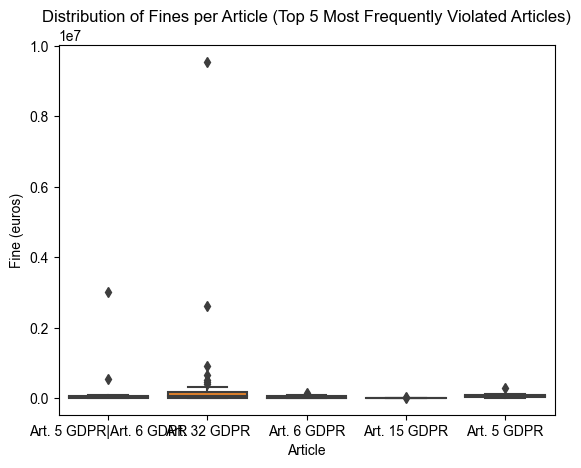

In [15]:
# Get the top 5 most frequently violated articles
top_5_articles = Violations['article_violated'].value_counts().nlargest(5).index.tolist()

# Filter the data to only include the top 5 articles
top_5_violations = Violations[Violations['article_violated'].isin(top_5_articles)]

# Create a boxplot of fines per article using seaborn
sns.boxplot(x='article_violated', y='price', data=top_5_violations)
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Distribution of Fines per Article (Top 5 Most Frequently Violated Articles)')
plt.xlabel('Article')
plt.ylabel('Fine (euros)')
plt.show()

7.Top 10 most violated articles

In [17]:
# Get the value counts of the article_violated column
article_counts = Violations['article_violated'].value_counts()

# Get the top 10 most frequently violated articles
top_10_articles = article_counts[:10]

# Create a DataFrame with the top 10 most frequently violated articles and their counts
top_10_df = pd.DataFrame({'Article': top_10_articles.index, 'Count': top_10_articles.values})

# Sort the DataFrame by the count column in descending order
sorted_df = top_10_df.sort_values('Count', ascending=False)

# Print the sorted DataFrame
print(sorted_df)

                           Article  Count
0                     Art. 32 GDPR     40
1                      Art. 6 GDPR     33
2          Art. 5 GDPR|Art. 6 GDPR     20
3                     Art. 15 GDPR     10
4                      Art. 5 GDPR     10
5  Art. 5 (1) f) GDPR|Art. 32 GDPR     10
6               Art. 5 (1) f) GDPR      7
7                     Art. 13 GDPR      7
8   Art. 5 (1) a) GDPR|Art. 6 GDPR      6
9               Art. 5 (1) c) GDPR      6


8.Article with the highest associated fine

In [18]:
# Get the sum of fines for each article violated
article_fines = Violations.groupby('article_violated')['price'].sum()

# Sort the articles by fine amount in descending order
sorted_articles = article_fines.sort_values(ascending=False)

# Get the article with the highest fine amount
highest_article = sorted_articles.index[0]

# Get the sum of fines for the highest article
highest_article_fine = sorted_articles.iloc[0]

print(f"The article with the highest associated price is {highest_article} with a total fine of {highest_article_fine} EUR.")


The article with the highest associated price is Art. 13 GDPR|Art. 14 GDPR|Art. 6 GDPR|Art. 4 GDPR|Art. 5 GDPR with a total fine of 50000000 EUR.
